# <b> 1. The Raw data files and their Format <b>

While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing.

Per request of the US Department of Transportation, we are currently investigating how to derive a strategy to reduce the incidence of road accidents across the nation. By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of states with similar profiles. How can we find such groups in a statistically sound way and communicate the result effectively?

To accomplish these tasks, we will make use of data wrangling, plotting, dimensionality reduction, and unsupervised clustering.

The data given to us was originally collected by the National Highway Traffic Safety Administration and the National Association of Insurance Commissioners. This particular dataset was compiled and released as a CSV-file by FiveThirtyEight under the CC-BY4.0 license.

In [47]:

#importing the os module
import os

#Check the name of current folder
curr_dir = os.getcwd()
print(f"Current directory: {curr_dir}")

#list all files in the folder
list_files = os.listdir(curr_dir)
print(f"List of files : {list_files}")

#list all files in dataset directory

dataset_files = os.listdir(list_files[1])
print(f"Files in Datasets: {dataset_files}")

#Read Raw csv file
#import csv module
import csv

#open csv module
print(" \n Raw CSV file - road_Accidents.csv \n ")
with open('datasets/road_accidents.csv', mode ='r') as file:
   
  # reading the CSV file
    csvFile = csv.reader(file)
 
  # displaying the contents of the CSV file
    for lines in csvFile:
        print(lines)

Current directory: C:\Users\Dell\Reducing Traffic Mortality in the US
List of files : ['.ipynb_checkpoints', 'datasets', 'main.ipynb']
Files in Datasets: ['miles_driven.csv', 'road_accidents.csv']
 
 Raw CSV file - road_Accidents.csv 
 
['##### LICENSE #####']
['# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)']
['# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)']
['##### COLUMN ABBREVIATIONS #####']
['# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)']
['# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)']
['# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)']
['# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)']
['##### DATA BEGIN #####']
['st

# 2. Read in and get an overview of the data

Next, we will orient ourselves to get to know the data with which we are dealing.

In [56]:
#import pandas library
import pandas as pd

#read in road_accidents.csv
car_accident = pd.read_csv("datasets/road_accidents.csv", comment = "#", sep="|")

#save number of rows and columns as tuple
rows_and_column = car_accident.shape
print(f"There are {rows_and_column[0]} rows and {rows_and_column[1]} columns in our road_accidents table")

print("Dataframe Overview")
#Generate an overview of dataframe
car_acc_info = car_accident.info()
print(f" \n{car_acc_info} \n")

#last 5 rows of dataframe

car_accident.tail()


There are 51 rows and 5 columns in our road_accidents table
Dataframe Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
 
None 



,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


# 3. Create a textual and a graphical summary of the data

We now have an idea of what the dataset looks like. To further familiarize ourselves with this data, we will calculate summary statistics and produce a graphical overview of the data. The graphical overview is good to get a sense for the distribution of variables within the data and could consist of one histogram per column. It is often a good idea to also explore the pairwise relationship between all columns in the data set by using a using pairwise scatter plots (sometimes referred to as a "scatterplot matrix").

Summary Statistics:        drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


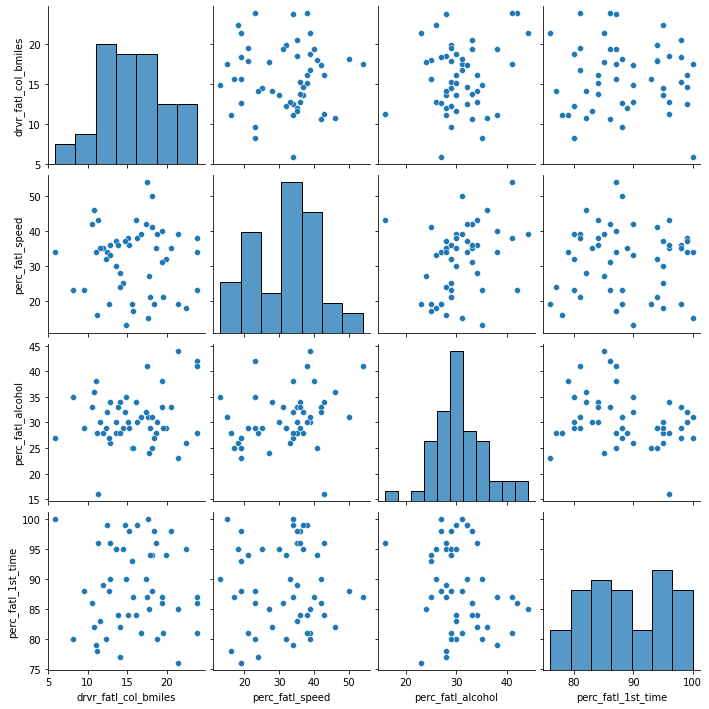

In [58]:
#import seaborn library

import seaborn as sns

#Plot appears in same notebook
#plotting commands below the output cell of the previous plot, will not affect the previous plot, which means it separates different plots.
%matplotlib inline 

#Compute summary statistics of all columns in "car_accident" dataframe
car_stats = car_accident.describe()
print(f"Summary Statistics: {car_stats}")

#create a pairwise scatterplot to explore data
sns.pairplot(data=car_accident)

# 4. Quantify the association of features and accidents

We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).

To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:

<li> 0.2 = weak
<li> 0.5 = medium
<li> 0.8 = strong
<li> 0.9 = very strong

In [59]:
# Compute the correlation coefficient for all column pairs

car_corr = car_accident.corr()
car_corr

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000
